In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc
import numpy as np
from scipy.optimize import curve_fit
from uncertainties import ufloat
from uncertainties import unumpy as unp
import array_to_latex as a2l
import csv
import pandas as pd
from astropy.io.votable import parse
from astropy.table import QTable, Table, Column

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']}) #font na grafih je LaTexov
rc('text', usetex=True)

In [3]:
mi_0 = 1.257e-6

R = unp.uarray([10.0e3], [0.5e3])
C = unp.uarray([1.0e-6], [0.1e-6])

N_1 = 2000
r = unp.uarray([18e-3], [0.1e-3]) / 2
r1 = unp.uarray([23.0e-3], [0.5e-3]) / 2

N_2 = 200
r2 = unp.uarray([250e-3], [2e-3]) / 2
d2 = 2.4e-2

I = unp.uarray([4.046], [0.001])

In [3]:
data = np.loadtxt('meritve1.txt')

d = unp.uarray(data[:, 0], 19 * [0.5]) * 1e-2

U = unp.uarray(data[:, 1], 19 * [0.5]) * 1e-3

len(unp.nominal_values(d)), len(unp.nominal_values(U))

print(a2l.to_ltx(data, frmt='{:6.2f}', arraytype='array'))

\begin{array}
    5.00 &  180.00\\
    6.00 &  171.00\\
    7.00 &  168.00\\
    8.00 &  143.00\\
    9.00 &  125.00\\
   10.00 &  111.00\\
   11.00 &   97.00\\
   12.00 &   84.00\\
   13.00 &   76.00\\
   14.00 &   69.00\\
   15.00 &   63.00\\
   16.00 &   60.00\\
   17.00 &   59.00\\
   18.00 &   56.00\\
   19.00 &   53.00\\
   20.00 &   27.00\\
   25.00 &   13.00\\
   30.00 &    9.00\\
   35.00 &    3.00
\end{array}
None


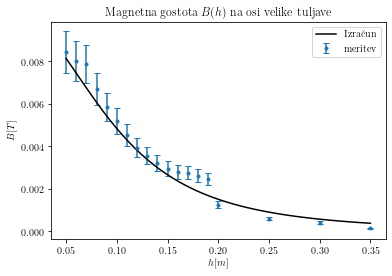

In [39]:
B_2 = U * 2 * R * C / (N_1 * (r ** 2 + r1 ** 2))

fig, ax = plt.subplots()

ax.errorbar(unp.nominal_values(d), unp.nominal_values(B_2), yerr=unp.std_devs(B_2), fmt='.', capsize=3, label='meritev')

raz = np.linspace(5e-2, 35e-2)
B_2_nap = N_2 * mi_0 * unp.nominal_values(I) * (unp.nominal_values(r2) ** 2) / (2 * ((unp.nominal_values(r2) ** 2 + raz ** 2) ** (3/2)))
ax.plot(raz, B_2_nap * 2.5, color = 'k', linestyle = '-', label = 'Izračun')

ax.set_title('Magnetna gostota $B(h)$ na osi velike tuljave')
ax.set_xlabel(r'$h[m]$')
ax.set_ylabel(r'$B[T]$')
ax.legend()
fig.savefig('graf1.pdf')

In [4]:
data1 = np.loadtxt('meritve2.txt')

I = unp.uarray(data1[:, 0], 11 * [0.1])
U = unp.uarray(data1[:, 0], 11 * [5e-2])

print(a2l.to_ltx(data1, frmt='{:6.2f}', arraytype='array'))

\begin{array}
    0.00 &    0.06\\
    0.50 &    0.60\\
    1.00 &    1.12\\
    1.55 &    1.54\\
    2.00 &    2.07\\
    2.52 &    2.50\\
    3.00 &    3.00\\
    3.50 &    3.45\\
    4.00 &    4.00\\
    4.50 &    4.35\\
    5.00 &    4.68
\end{array}
None


(0.046893317748509224,
 8.427657172994096e-12,
 37305.74204336454,
 6.704580089891882e-06)

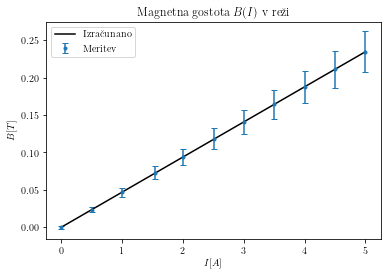

In [50]:
B_B = U * 2 * R * C / (N_1 * (r ** 2 + r1 ** 2))

def linearna (x, k, n):
    return k * x + n

par, cov = curve_fit(linearna, unp.nominal_values(I), unp.nominal_values(B_B))
k, n = par

dk, dn = np.sqrt(np.diag(cov))

fig, ax = plt.subplots()

ax.errorbar(unp.nominal_values(I), unp.nominal_values(B_B), yerr=unp.std_devs(B_B), fmt='.', capsize=3, label='Meritev')

tok = np.linspace(0, 5)

ax.plot(tok, linearna(tok, *par), label='Izračunano', color='k')

ax.set_title('Magnetna gostota $B(I)$ v reži')
ax.set_xlabel(r'$I[A]$')
ax.set_ylabel(r'$B[T]$')
ax.legend()
fig.savefig('graf2.pdf')
k, dk, k/mi_0, dk/mi_0
